<a href="https://colab.research.google.com/github/rohitnikam1/Basic_Financial_Analysis/blob/master/7_Maximum_Likelihood_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maximum Likelihood Estimates (MLEs)**
In this section, we will look into MLE for normal distribution and exponential distribution. Later we will fit a normal distribution to asset returns using MLE. First let's import some libraries.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

## **Normal Distribution**
We'll start by sampling some data from a normal distribution.

In [2]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

Now let's compute the MLE for the $\mu$ and $\sigma$ parameters of the given data with scipy's built-in `fit()` function.

Recall that
\begin{align}
\hat\mu = &\frac{1}{T}\sum_{t=1}^{T} x_t \\
\hat\sigma = &\sqrt{\frac{1}{T}\sum_{t=1}^{T}{(x_t - \hat\mu)^2}}
\end{align}

In [5]:
mu, std = scipy.stats.norm.fit(X)
print(f'mu estimate: {mu}')
print(f'std estimate: {std}')

mu estimate: 39.88107672902781
std estimate: 10.106616631495818


Now let's plot the distribution PDF along with the data to see how well it fits. We can do that by accessing the pdf provided in `scipy.stats.norm.pdf`.

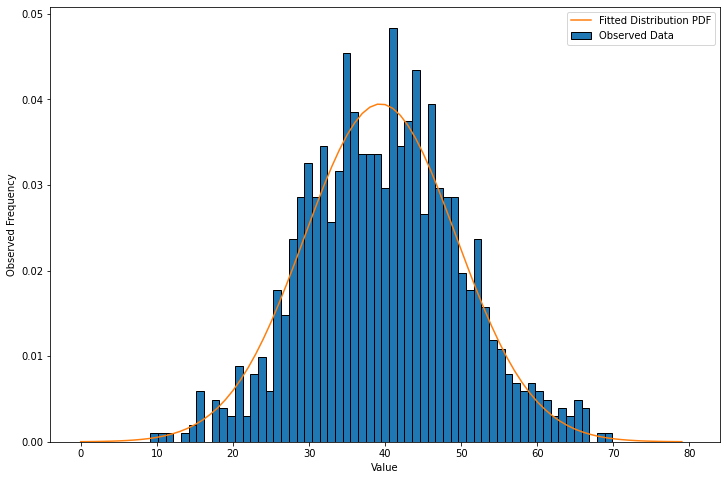

In [9]:
pdf = scipy.stats.norm.pdf
# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)
x = np.linspace(0, 80, 80)
_, ax = plt.subplots(figsize=(12,8))
ax.hist(X, bins=x, density='true', ec='black')
ax.plot(pdf(x, loc=mu, scale=std))
ax.set_xlabel('Value')
ax.set_ylabel('Observed Frequency')
ax.legend(['Fitted Distribution PDF', 'Observed Data', ]);

## **Exponential Distribution**
Let's do the same thing, but for the exponential distribution. We'll start by sampling some data.


In [10]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

Now let's compute the MLE for the $\lambda$ parameter of the given data with scipy's built-in fit() function.

In [12]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=0)

In [14]:
print(f'lambda estimate: {l}')

lambda estimate: 4.7635218998912805


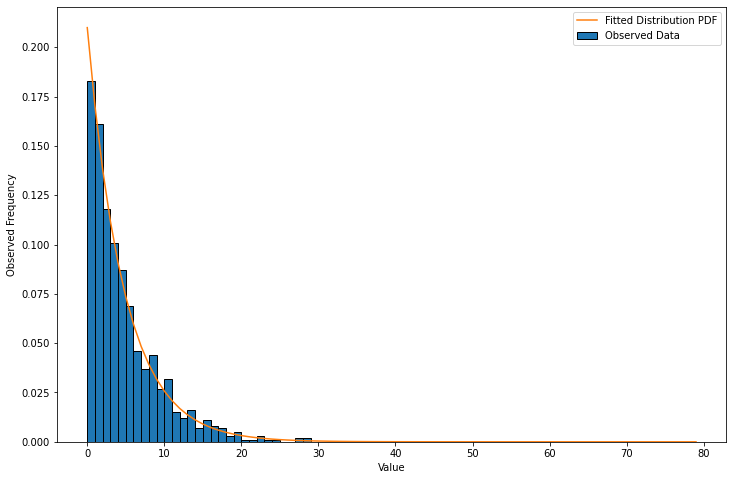

In [19]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
_, ax = plt.subplots(figsize=(12,8))
ax.hist(X, bins=x, density='true', ec = 'black')
ax.plot(pdf(x, scale=l))
ax.set_xlabel('Value')
ax.set_ylabel('Observed Frequency')
ax.legend(['Fitted Distribution PDF', 'Observed Data', ]);

## **MLE for Asset Returns**
Now we'll fetch some real returns and try to fit a normal distribution to them using MLE.


In [20]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=5f41cd8c81db85d47d445d03ffd2c23baeac37a9660d4fde0ab98b2bba600337
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [21]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [23]:
def get_data(tickers, start, end):
  '''Get stock data for tickers'''
  stockData = pdr.get_data_yahoo(tickers, start=start, end=end)
  stockData = stockData['Close']
  return stockData

In [24]:
prices = get_data(['TSLA'], start='2014-01-01', end='2015-01-01')
absolute_returns = np.diff(prices)
returns = absolute_returns/prices[:-1]

[*********************100%***********************]  1 of 1 completed


Let's use scipy's fit function to get the $\mu$ and $\sigma$ MLEs.

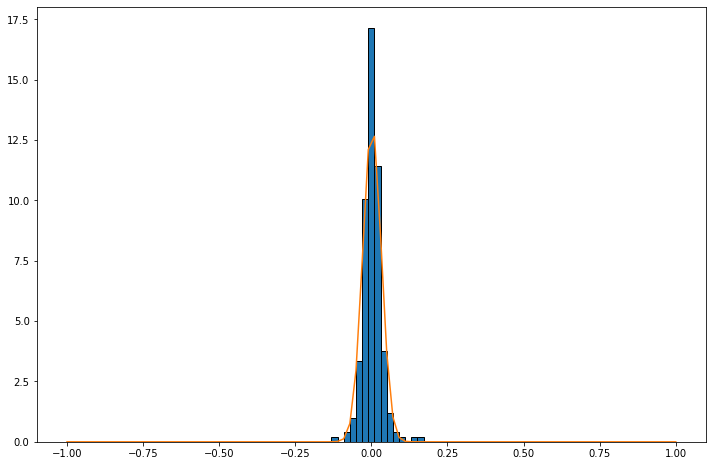

In [27]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
_, ax = plt.subplots(figsize = (12,8))
ax.hist(returns, bins=x, density='true', ec='black')
ax.plot(x, pdf(x, loc=mu, scale=std));

Of course, this fit is meaningless unless we've tested that they obey a normal distribution first. We can test this using the Jarque-Bera normality test. The Jarque-Bera test will reject the hypothesis of a normal distribution if the p-value is under a c.

In [28]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(returns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(249.43350770703043,
 6.858071372376853e-55,
 0.7513125049011787,
 7.646755207269467)

In [29]:
jarque_bera(np.random.normal(0, 1, 100))

(1.273873069808033, 0.5289102427798524, -0.22030851240449026, 2.66595483209241)